In [183]:
# Загрузка библиотек
import numpy as np # для работы с массивами
import pandas as pd # для работы с DataFrame 
from sklearn import datasets # для импорта данных
import seaborn as sns # библиотека для визуализации статистических данных
import matplotlib.pyplot as plt # для построения графиков

params = {'figure.constrained_layout.use': False,
          'axes.facecolor': 'gainsboro',
          'axes.grid': True,
          'grid.linestyle': '--',
          'axes.labelsize': 16,
          'axes.titlesize': 18,
          'xtick.labelsize': 16,
          'ytick.labelsize': 16}
plt.rcParams.update(params)
%matplotlib inline

### Содержание<a name="1"></a>

1. [Неоднородные СЛАУ](#2)
2. [Случай «Идеальная пара»](#3)
3. [Случай «В активном поиске»](#4)
4. [Случай «Всё сложно»](#5)
5. [Классическая OLS линейная регрессия](#6)
6. [Проблемы в классической OLS модели](#7)
7. [Стандартизация признаков](#8)
8. [Корреляционная матрица](#9)
9. [Практика. Классический OLS алгоритм](#10)
10. [Линейный оператор](#11)
11. [Собственные векторы и числа](#12)
12. [Комплексные числа](#13)
13. [Метод главных компонент, PCA](#14)
14. [Сингулярное разложение, SVD](#15)

---

### Неоднородные СЛАУ<a name="2"></a>

В решении СЛАУ возможно 3 случая:

1. __«Идеальная пара»__  
   Это так называемые определённые системы, имеющие единственное решение.
2. __«В активном поиске»__  
   Недоопределённые системы, в которых решений бесконечно много.
3. __«Всё сложно»__  
   Это переопределённые системы, в которых решений нет вовсе

> *__Комментарий:__*  
> *В изложенной выше классификации неоднородных систем допущено не вполне «честное» упрощение в терминологии.*

> *На самом деле, недоопределённые системы — это те, в которых независимых уравнений меньше, чем неизвестных. Они могут иметь бесконечно много решений (быть совместными) или ни одного решения (быть несовместными, если уравнения противоречат друг другу).*

> *На практике, в обучении регрессий, например, этот случай практически не встречается.*

> *Что касается переопределённых систем, то в них помимо несовместности (т. е. отсутствия решений) ещё и количество независимых уравнений превышает количество неизвестных — как раз тот самый случай, что мы видим в регрессионном анализе.*

[К содержанию](#1)

---

### Случай «Идеальная пара»<a name="3"></a>

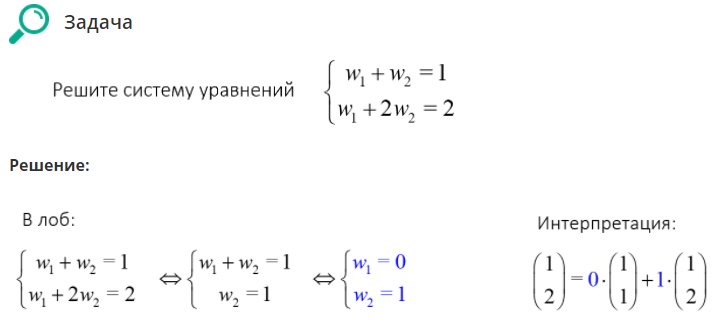

В матричном виде система запишется следующим образом:

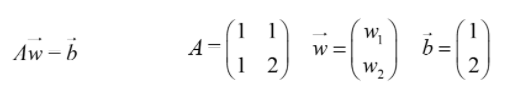

Матрица __A__ — это __матрица коэффициентов системы уравнений__.

Вектор __b__ — это __вектор свободных коэффициентов__.

Преобразование уравнений — то же самое, что преобразование __расширенной матрицы системы (A|b)__. Вычитая сначала первую строку из второй, а затем результат из первой, получим то же решение, что и в лоб. Других решений нет.

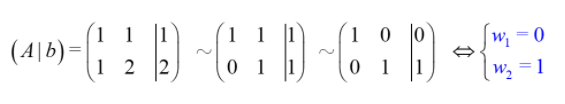

Существование и единственность решения гарантирует равенство рангов:

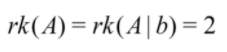

Решение можно записать одной формулой. Для её вывода умножим уравнение в матричном виде на A−1 слева.

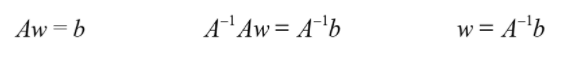

Таким образом, решение можно найти одной формулой: __w=A-1b__.

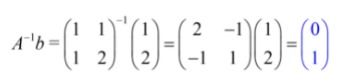

> Такой метод можно применять только для квадратных невырожденных матриц __A__.

__Резюме__

Пусть у нас есть квадратная система с __k__ неизвестными.

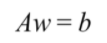

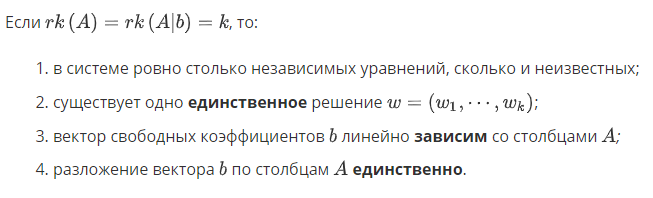

[К содержанию](#1)

---

### Случай «В активном поиске»<a name="4"></a>

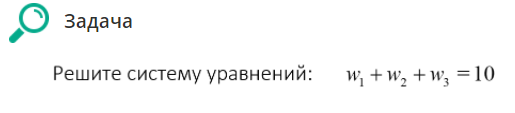

Имеем одно уравнение с тремя неизвестными. Значит, два из них можем задать как угодно. Например, __w2__ и  __w3__ зададим произвольными числами __α__ и __β__. Тогда __w1 = 10 – α – β__.

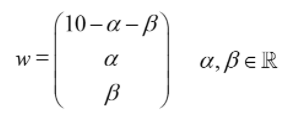

Запишем расширенную матрицу

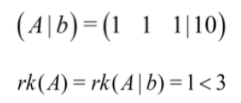

Её ранг, как и ранг А, равен 1 и это меньше числа неизвестных. Такая картинка говорит о существовании, но неединственности решения.

__Резюме__

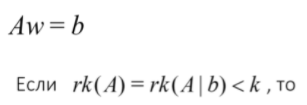

1. __не хватает__ уравнений ⇒ ∞ __решений__;
2. вектор b линейно __зависим__ со столбцами А;
3. разложение вектора b по столбцам А __НЕединственно__.

[К содержанию](#1)

---

### Случай «Всё сложно»<a name="5"></a>

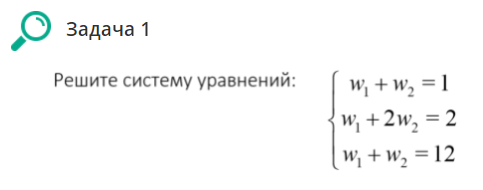

Очевидно, что система не имеет решений, так как первое и третье уравнения противоречат друг другу.

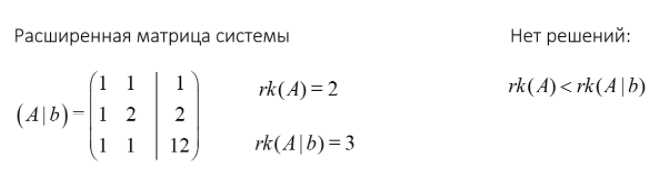

> __Критерий переопределенности__ системы уравнений: ранг матрицы коэффициентов меньше ранга расширенной матрицы.

Получается, что идеальное решение найти нельзя, но можно найти приблизительное.

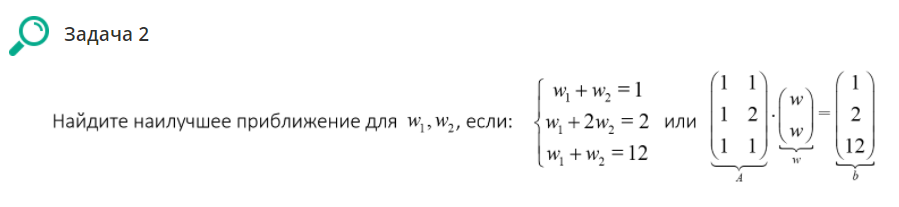

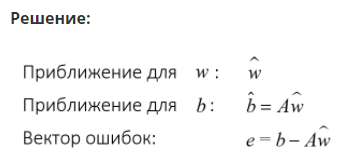

Например, если возьмём в качестве приближения для решения следующие векторы, то получим соответствующие векторы приближений и векторы ошибок 

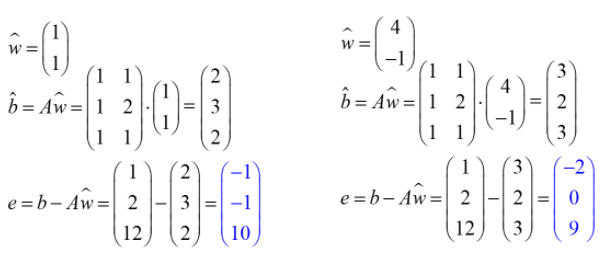

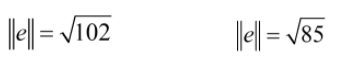

> __Наилучшим приближением__ будет то, у которого длина вектора ошибок минимальна.

> *__Комментарий:__*  
> *В классификации неоднородных систем допущено не вполне «честное» упрощение в терминологии.*  
> *В переопределённой системе помимо несовместности (о которой говорит несоответствие рангов А и (А|b)) ещё и независимых уравнений больше, чем неизвестных.*  
> *Для наших дальнейших задач эта разница не очень существенна, т. к. несовместные недоопределённые системы встречаются в анализе данных крайне редко.*

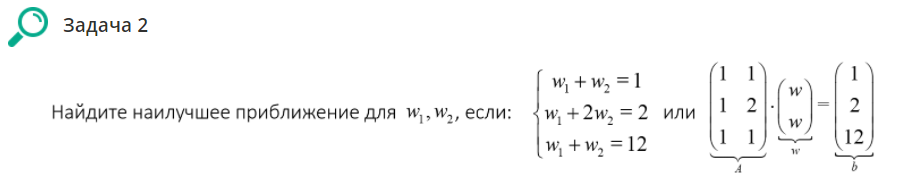

Не существует таких w1 и w2, что:

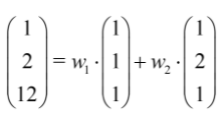

Геометрически это значит, что __вектор свободных коэффициентов b__ не лежит в одной плоскости __со столбцами матрицы А__ (подобную задачу мы решали в 1 модуле, раздел «Векторы. Практическая задача»). Напомним, что идея решения была в том, что наилучшим приближением для коричневого вектора является ортогональная проекция на плоскость — __голубой вектор__. Потому что наименьший по длине вектор ошибок — это перпендикуляр к плоскости, __красный вектор__. 

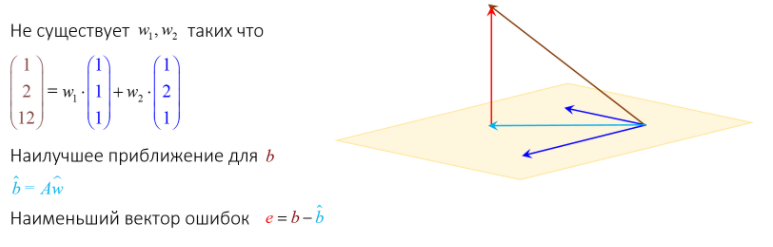

__Выведем формулу:__

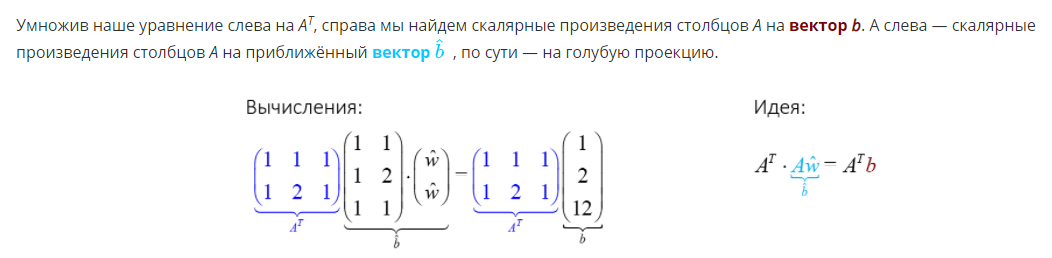

Упростим уравнение, перемножив всё, что содержит только числа. В левой части умножим АТ на А, в правой части умножим АТ на b. Тогда слева получим матрицу  2 × 2 — это ни что иное как матрица Грама столбцов А. Столбцы А линейно независимы, а это значит, что АТ · А — невырожденная квадратная матрица. Получившаяся система — один в один случай «идеальная пара», а это значит, что теперь мы можем её решить!

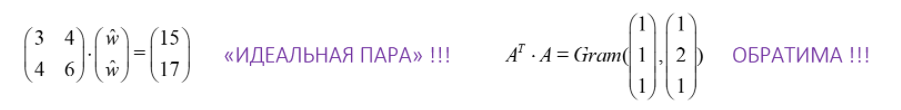

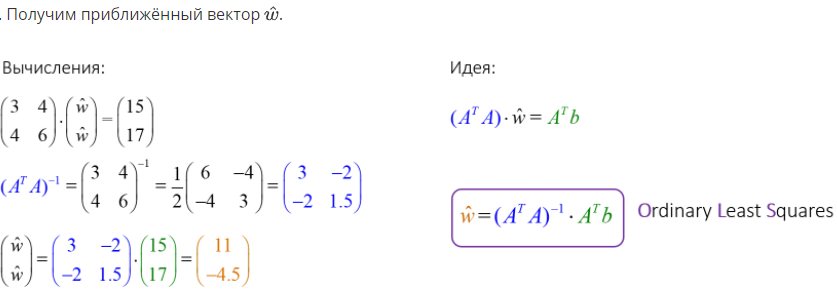

__Резюме__

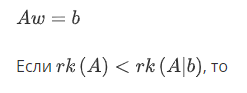

1. __нет точных__ решений;
2. вектор b линейно __независим__ со столбцами А;
3. разложение вектора b по столбцам А __невозможно__.
4. __есть приближённые__ решения;
5. __OLS__ оценка 
6. идея: __ортогональная проекция__.


__Задания__

> *Задача 1*

In [2]:
v1 = np.array([1, -5])
v2 = np.array([2, 1])
v3 = np.array([1, 1])
A = np.array([v1,v2,v3])

In [15]:
b = np.reshape(np.array([1,2,2]),(3,1))
w = np.reshape(np.array([1,1]),(2,1))

Вычислите вектор ошибок для приближённого решения системы w

In [12]:
Aw = A@w

In [16]:
e = b - Aw
e

array([[ 5],
       [-1],
       [ 0]])

> *Задача 2*

In [18]:
v1 = np.array([1, 2])
v2 = np.array([-3, 1])
v3 = np.array([1, 2])
v4 = np.array([1, -1])
A = np.array([v1,v2,v3,v4])
b = np.reshape(np.array([1,4,5,0]),(4,1))

In [26]:
A.T@A

array([[12,  0],
       [ 0, 10]])

In [27]:
np.diagonal(np.linalg.inv(A.T@A))

array([0.08333333, 0.1       ])

In [21]:
A.T@b

array([[-6],
       [16]])

In [25]:
w = np.linalg.inv(A.T@A)@(A.T@b)
w

array([[-0.5],
       [ 1.6]])

[К содержанию](#1)

---

### Классическая OLS линейная регрессия<a name="6"></a>

__Постановка задачи__

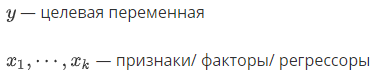

Поставить задачу — означает ответить на два вопроса: __что у нас есть?__ и __что мы хотим?__

__Что у нас есть?__

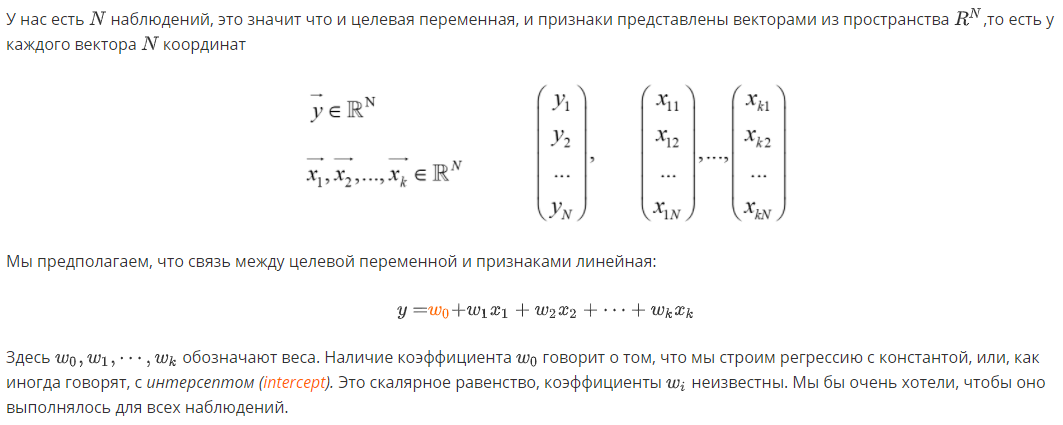

__Что мы хотим?__

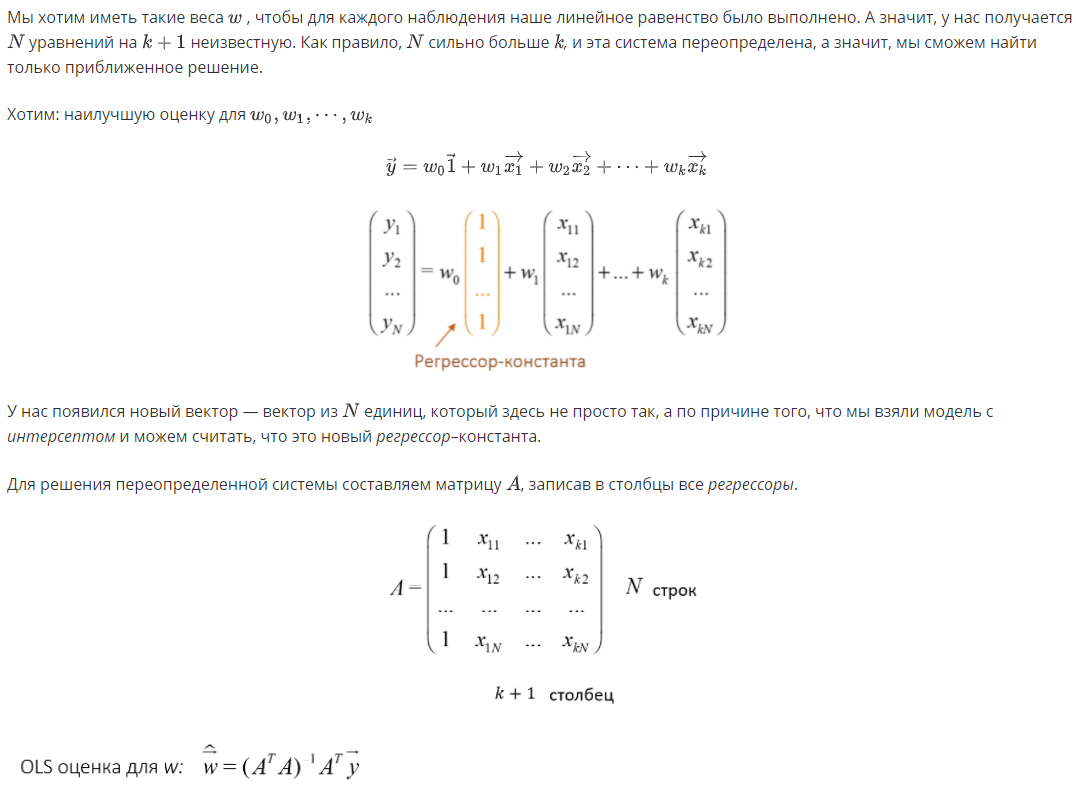

__Сделаем прогноз__. Допустим, у нас есть новое наблюдение по регрессорам. Как предсказать значение целевой переменной? 

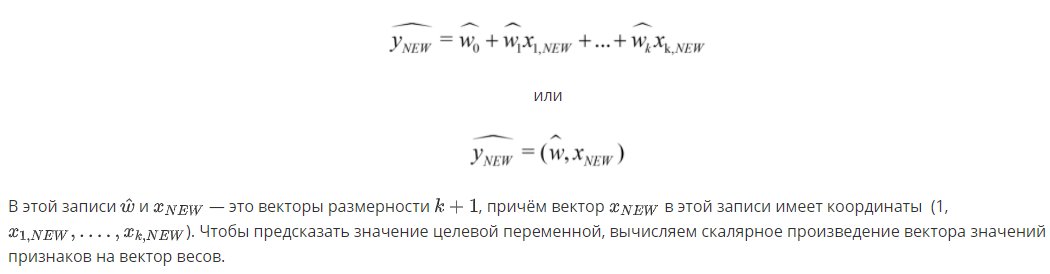

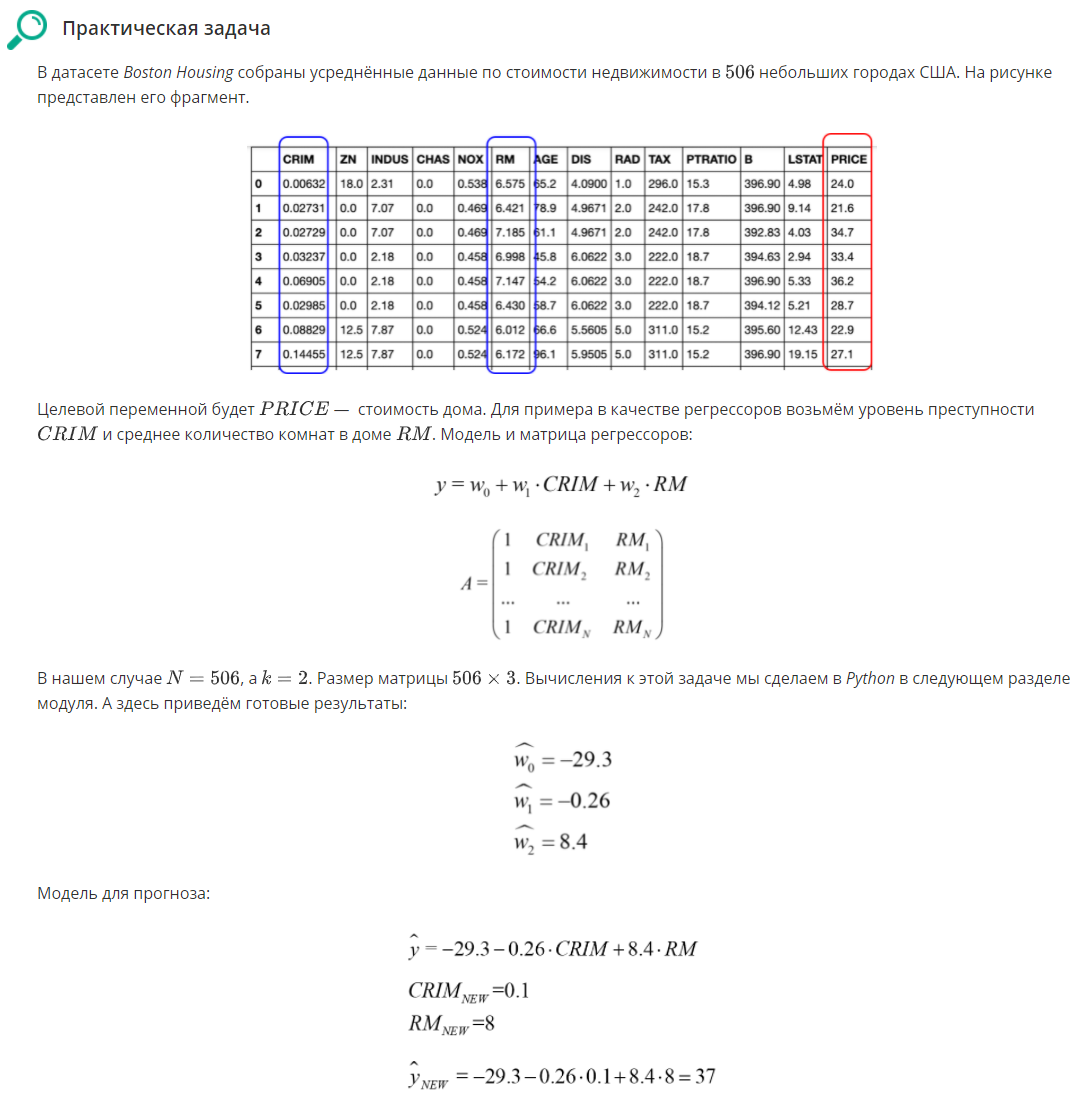

In [28]:
-29.3-0.26*0.2+8.4*6

21.048000000000005

[К содержанию](#1)

---

### Проблемы в классической OLS модели<a name="7"></a>

__Когда возникают проблемы?__

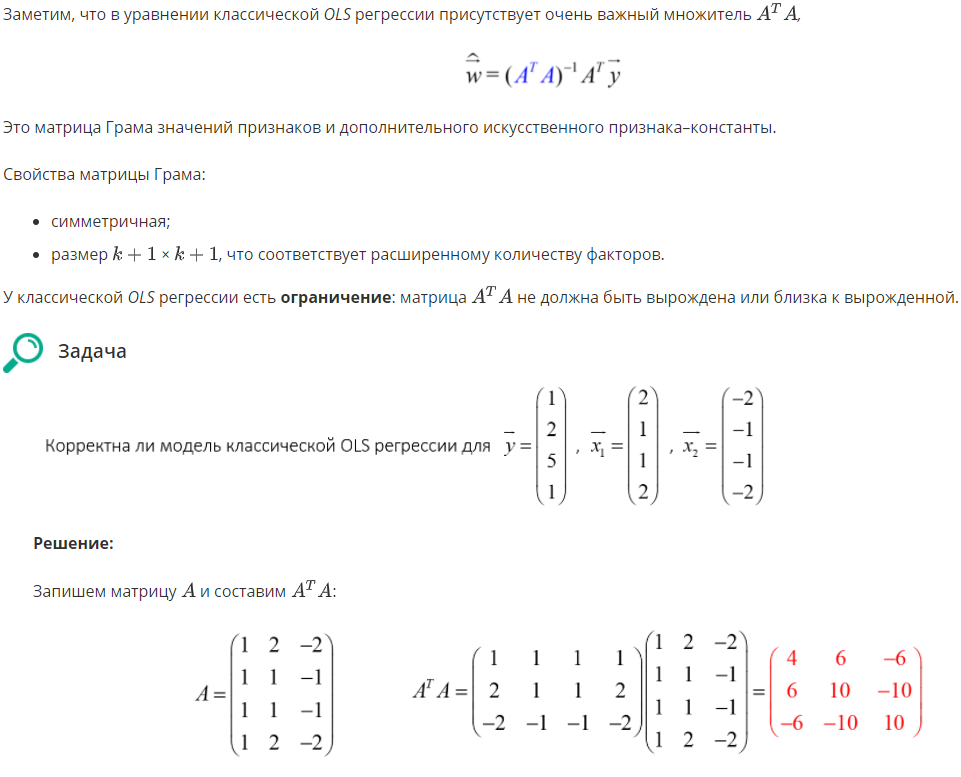

Вторая и третья строки матрицы A.T@A пропорциональны ⇒ матрица вырождена ⇒ обратная не существует ⇒ классическая OLS модель для таких данных неприменима.

__Как быть?__

Борьба с вырожденностью A.T@A  часто сводится к устранению «плохих», то есть зависимых признаков тем или иным способом.  Для этого анализируют корреляционную матрицу признаков или матрицу их значений.  

Но иногда проблема может заключаться, например, в том, что один признак измерен в тысячных долях, а другой в тысячах единиц. Тогда коэффициенты при них могут отличаться в миллион раз.  

Для устранения этой проблемы может помочь стандартизация данных.

[К содержанию](#1)

---

### Стандартизация признаков<a name="8"></a>

Стандартизация состоит из двух шагов:

1. Центрирование 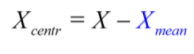
2. Нормирование 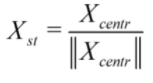

__Техника__

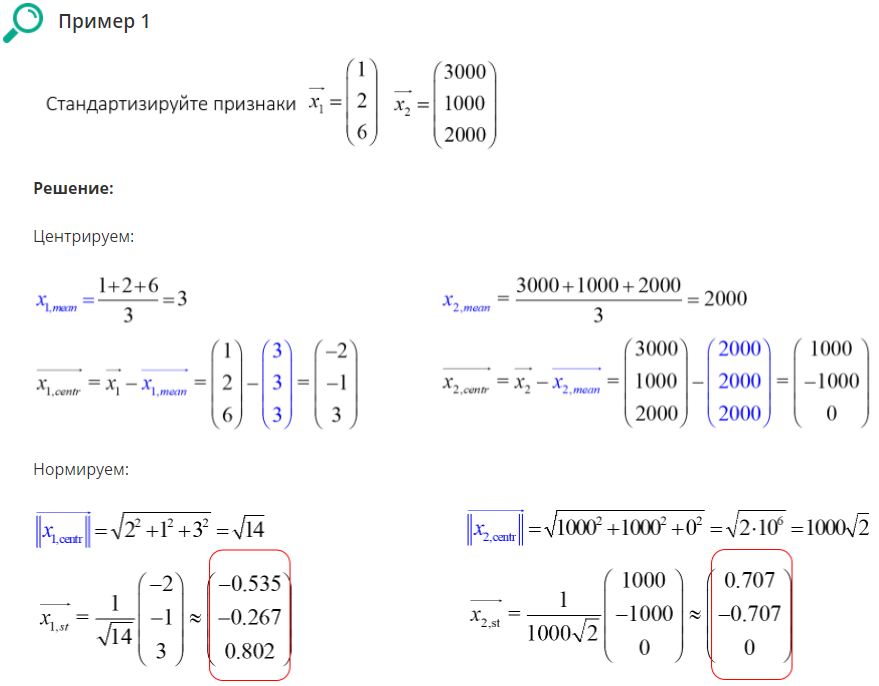

Как видите, теперь оба признака имеют значения от -1 до 1 и равный порядок, в отличие от исходных признаков.

__Что произойдет с матрицей Грама?__

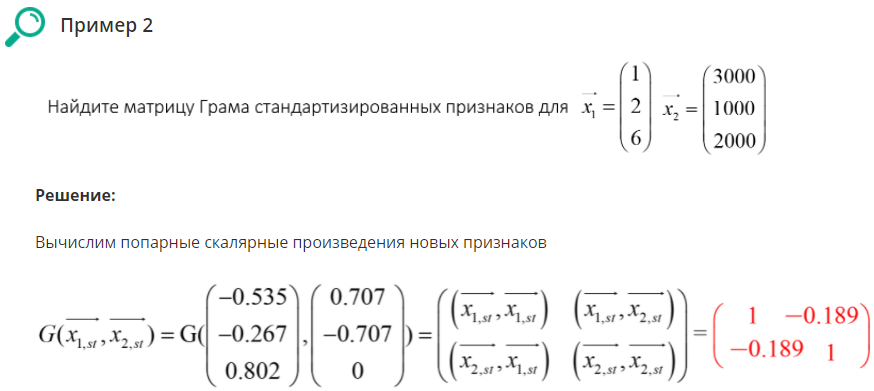

Как видите в ней все числа от -1 до 1. Забегая вперёд, скажем, что это так называемые выборочные корреляции признаков, а сама матрица называется __матрицей корреляций__.

__Как сделать новую регрессию?__

До стандартизации мы прогоняли регрессию y на регрессоры x1,x2,...,xk и константу. Всего получалось k+1 коэффициентов

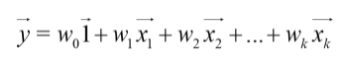

После стандартизации (см. формулы в конце конспекта) мы прогоняем регрессию стандартизованного y на стандартизованные регрессоры БЕЗ константы

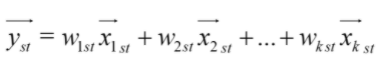

Математически мы получим одну и ту же регрессию в том смысле, что если пересчитать стандартизированные коэффициенты, мы получим исходные, то же и с прогнозом (пересчёт здесь опустим).

__Бонусы приближенных вычислений__

Математика говорит, что регрессия исходного y на исходные (_сырые_) признаки c константой точно такая же, как регрессия стандартизированного y на стандартизированные признаки без константы. В чём же разница? Математически — ни в чём.  

Но когда считает компьютер, появляется ошибка округления, и если какой-то признак по модулю очень маленький, а другой очень большой, то вычисления _в лоб_ будут крайне неустойчивы. Стандартизация этой проблемы позволяет избежать.

Более важный бонус заключается в том, что после стандартизации __матрица Грама__ признаков как по волшебству __превращается__ в __корреляционную матрицу__, о которой пойдет речь в следующем видео. Почему это хорошо? На свойства корреляционной матрицы опираются такие алгоритмы, как: метод главных компонент и сингулярное разложение. А т.к. _сырая_ и стандартизированная регрессия математически эквивалентны, то имеет смысл исследовать стандартизированную, а результаты обобщить на _сырую_.

__Стандартизация признаков (формулы)__

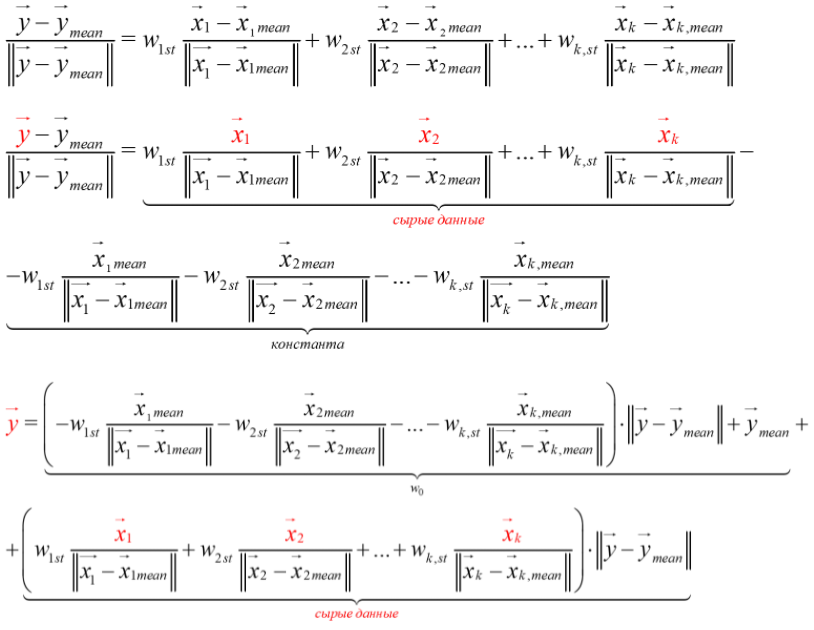

__Задачи__

In [29]:
x = np.array([11,8])

In [30]:
np.mean(x)

9.5

In [45]:
xm = np.array([9.5,9.5])
xm

array([9.5, 9.5])

In [46]:
xc = x-xm
xc

array([ 1.5, -1.5])

In [42]:
xc = np.reshape(xc,(2,1))

In [48]:
xcn = (1.5**2+1.5**2)**0.5
xcn

2.1213203435596424

In [49]:
1/xcn*xc

array([ 0.70710678, -0.70710678])

[К содержанию](#1)

---

### Корреляционная матрица<a name="9"></a>

*Определение*:  __Корреляционная матрица__ — это матрица выборочных корреляций между факторами регрессии. 

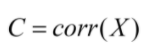

Корреляционная матрица измеряет __тесноту__ линейной связи между факторами, а потому симметрична: C.T = C. Мы будем рассматривать __коэффициент корреляции Пирсона__: элементы матрицы — это попарные корреляции факторов.

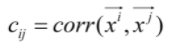

Проинтерпретируем выборочные коэффициенты корреляции:

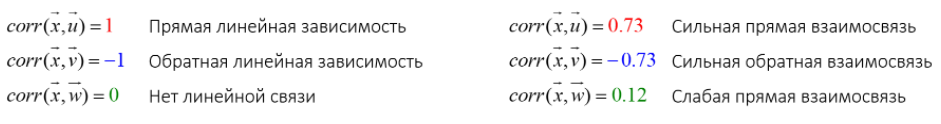

__Свойства__


* __corr (factor, target) — хорошо__

 Чем больше по модулю корреляция между фактором и целевым параметром, тем лучше.

* __corr (factor1, factor2) — плохо__

 Чем больше по модулю корреляция между факторами, тем хуже.

 Чем больше линейно зависимых факторов, тем ниже ранг.

Можно выделить два неприятных случая:

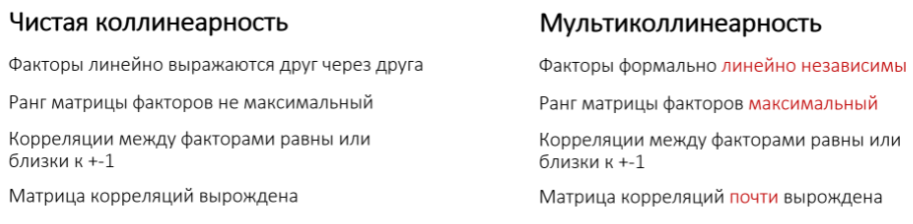

__Как обнаружить мультиколлинеарность:__

* Из контекста.
* Определитель корреляционной матрицы близок к 0.
* Стандартная регрессионная формула даёт странные результаты.
* Спектр матрицы корреляций и число обусловленности.

__Как бороться с мультиколлинеарностью:__

1. Исключить зависимые факторы «на глаз».
2. Метод главных компонент для корреляционной матрицы.
3. Сингулярное разложение матрицы факторов.
4. Гребневая регрессия (Ridge regression).

[К содержанию](#1)

---

### Практика. Классический OLS алгоритм<a name="10"></a>

In [51]:
# загружаем датасет
boston = datasets.load_boston()
bostonDF=pd.DataFrame(boston.data, columns=boston.feature_names)
bostonDF['PRICE']=boston.target
bostonDF.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [52]:
# CRIM: Per capita crime rate by town
# ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
# INDUS: Proportion of non-retail business acres per town
# CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
# NOX: Nitric oxide concentration (parts per 10 million)
# RM: Average number of rooms per dwelling
# AGE: Proportion of owner-occupied units built prior to 1940
# DIS: Weighted distances to five Boston employment centers
# RAD: Index of accessibility to radial highways
# TAX: Full-value property tax rate per $10,000
# PTRATIO: Pupil-teacher ratio by town
# B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town
# LSTAT: Percentage of lower status of the population
# MEDV: Median value of owner-occupied homes in $1000s

In [53]:
# Хотим узнать, как обращаться к столбцам bostonDF
bostonDF.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [54]:
# полная матрица корреляций
# используем метод Pandas corr()
C = bostonDF.corr(method='pearson')
C

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<AxesSubplot:>

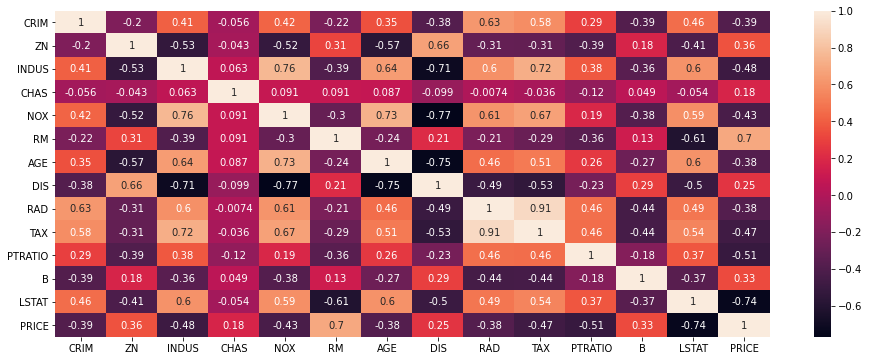

In [55]:
# представим корреляционную матрицу в виде "тепловой карты" с помощью функции heatmap из библиотеки seaborn
plt.figure(figsize=(16,6)) # размер графика
sns.heatmap(data=C, annot=True)

Строим регрессию из видео

In [56]:
Data=bostonDF[['CRIM','RM']]
Data.head()

,CRIM,RM
0,0.00632,6.575
1,0.02731,6.421
2,0.02729,7.185
3,0.03237,6.998
4,0.06905,7.147


In [57]:
np.shape(Data)

(506, 2)

In [58]:
# Создаем вектор из единиц для коэффициента w_0 и записываем все векторы в СТОЛБЦЫ матрицы признаков А
CRIM=Data['CRIM']
RM= Data['RM']
A= np.column_stack((np.ones(506), CRIM, RM))
A

array([[1.0000e+00, 6.3200e-03, 6.5750e+00],
       [1.0000e+00, 2.7310e-02, 6.4210e+00],
       [1.0000e+00, 2.7290e-02, 7.1850e+00],
       ...,
       [1.0000e+00, 6.0760e-02, 6.9760e+00],
       [1.0000e+00, 1.0959e-01, 6.7940e+00],
       [1.0000e+00, 4.7410e-02, 6.0300e+00]])

In [59]:
# Добавим настройку для удобного чтения значений А
np.set_printoptions(suppress=True)
A

array([[1.     , 0.00632, 6.575  ],
       [1.     , 0.02731, 6.421  ],
       [1.     , 0.02729, 7.185  ],
       ...,
       [1.     , 0.06076, 6.976  ],
       [1.     , 0.10959, 6.794  ],
       [1.     , 0.04741, 6.03   ]])

In [60]:
# Создаем целевой вектор
y=bostonDF[['PRICE']] # объект типа dataframe - то, что нужно
y_s = bostonDF['PRICE'] #  объект типа series - не подойдет

In [61]:
type(y)

pandas.core.frame.DataFrame

In [62]:
type(y_s)

pandas.core.series.Series

In [63]:
# вычислим OLS оценку для коэффициентов
w_hat=np.linalg.inv(A.T@A)@A.T@y
w_hat

,PRICE
0,-29.244719
1,-0.264913
2,8.391068


In [64]:
# прогноз
# добавились данные по новому городку:
CRIM_new=0.1
RM_new=8
# делаем прогноз типичной соимости дома
PRICE_new=w_hat.iloc[0]+w_hat.iloc[1]*CRIM_new+w_hat.iloc[2]*RM_new
PRICE_new

PRICE    37.857335
dtype: float64

In [65]:
# короткий способ сделать прогноз
new=np.array([1,CRIM_new,RM_new])
new@w_hat

PRICE    37.857335
dtype: float64

In [66]:
# классическая OLS регрессия в numpy одной командой
np.linalg.lstsq(A,y,rcond=None)

(array([[-29.24471945],
        [ -0.26491325],
        [  8.39106825]]),
 array([19565.80724199]),
 3,
 array([219.85111475, 127.94826644,   2.38123074]))

Стандартизация данных

In [67]:
Data.head()

,CRIM,RM
0,0.00632,6.575
1,0.02731,6.421
2,0.02729,7.185
3,0.03237,6.998
4,0.06905,7.147


In [68]:
# метод .mean() позволяет вычислить арифметическое среднее значение вектора
meanCRIM = Data['CRIM'].mean()
meanRM  = Data['RM'].mean()
mean_y = y.mean()
print('mean value of CRIME:', meanCRIM)
print('mean value of RM:', meanRM)
print('mean value of PRICE:', mean_y)

mean value of CRIME: 3.6135235573122535
mean value of RM: 6.284634387351787
mean value of PRICE: PRICE    22.532806
dtype: float64


In [69]:
# Центрирование
CRIM_c = Data['CRIM'] - meanCRIM
RM_c = Data['RM'] - meanRM
y_c = y - mean_y
print('CRIME до центрирования:\n', CRIM.head(4))
print('CRIME после центрирования:\n', CRIM_c.head(4))


CRIME до центрирования:
 0    0.00632
1    0.02731
2    0.02729
3    0.03237
Name: CRIM, dtype: float64
CRIME после центрирования:
 0   -3.607204
1   -3.586214
2   -3.586234
3   -3.581154
Name: CRIM, dtype: float64


In [70]:
print('среднее арифметическое вектора CRIM после центрирования:',CRIM_c.mean())

среднее арифметическое вектора CRIM после центрирования: -3.0524550827243434e-15


In [71]:
# вычисляем длины векторов для нормирования
CRIM_c_norm = np.linalg.norm(CRIM_c)
RM_c_norm = np.linalg.norm(RM_c)
y_c_norm = np.linalg.norm(y_c)
print('norm of CRIME:\n', CRIM_c_norm)

norm of CRIME:
 193.2956853903625


In [72]:
# Нормирование: делим каждый центрированный вектор на его длину
CRIM_st=CRIM_c / CRIM_c_norm
RM_st=RM_c / RM_c_norm
y_st=y_c / y_c_norm
print('CRIME до центрирования:\n', CRIM.head(4))
print('CRIME после центрирования:\n', CRIM_c.head(4))
print('CRIME после нормирования:\n', CRIM_st.head(4))

CRIME до центрирования:
 0    0.00632
1    0.02731
2    0.02729
3    0.03237
Name: CRIM, dtype: float64
CRIME после центрирования:
 0   -3.607204
1   -3.586214
2   -3.586234
3   -3.581154
Name: CRIM, dtype: float64
CRIME после нормирования:
 0   -0.018662
1   -0.018553
2   -0.018553
3   -0.018527
Name: CRIM, dtype: float64


In [73]:
# Матрица центрированных признаков - БЕЗ константы!
A_st=np.column_stack(( CRIM_st, RM_st,))
A_st

array([[-0.01866158,  0.01838996],
       [-0.01855299,  0.00863655],
       [-0.0185531 ,  0.05702358],
       ...,
       [-0.01837994,  0.04378681],
       [-0.01812732,  0.03226006],
       [-0.01844901, -0.01612696]])

In [74]:
# OLS оценка коэффициентов центрированной регрессии
w_hat_st=np.linalg.inv(A_st.T@A_st)@A_st.T@y_st.values
w_hat_st

array([[-0.24775878],
       [ 0.64103965]])

In [75]:
# добавились данные по новому городку:
CRIM_new=0.1
RM_new=8
# чтобы сделать прогноз по новым данным, их тоже нужно стандартизировать

In [76]:
# Стандартизация новых данных
CRIM_new_st = (CRIM_new - meanCRIM) / CRIM_c_norm
RM_new_st = (RM_new - meanRM) / RM_c_norm
print('new CRIME st:', CRIM_new_st)
print('new RM st:', RM_new_st)

new CRIME st: -0.018176937318681783
new RM st: 0.10864062828128358


In [77]:
# Прогноз стандартизированного y
y_st_new = w_hat_st[0]*CRIM_new_st + w_hat_st[1]*RM_new_st
print('new PRICE st predict:', y_st_new)

new PRICE st predict: [0.07414645]


Стандартизированный прогноз для нас может не иметь никакого смысла сам по себе, 

поэтому его необходимо пересчитать обратно.

Для этого сделаем операции, обратные стандартизации - умножим на длину центрированного вектора y и прибавим среднее


In [78]:
# Пересчет стандартизированного прогноза в понятный
y_new = y_st_new * y_c_norm + mean_y
print('new PRICE predict:', y_new)

new PRICE predict: PRICE    37.857335
dtype: float64


In [79]:
# Пересчет стандартизированных коэффициентов в обычные
# здесь создаем вектор из единиц, который далее заполним нужными значениями
w_hat_not_st=np.ones((3,1))

In [80]:
# Пересчет стандартизированных  коэффициентов в обычные
w_hat_not_st[0]= (- w_hat_st[0] * meanCRIM / CRIM_c_norm - w_hat_st[1] * meanRM / RM_c_norm) * y_c_norm  + y.mean()
w_hat_not_st[1] = (w_hat_st[0] / CRIM_c_norm) * y_c_norm
w_hat_not_st[2] = ( w_hat_st[1] / RM_c_norm )* y_c_norm
w_hat_not_st

array([[-29.24471945],
       [ -0.26491325],
       [  8.39106825]])

In [81]:
# Сравнение с ранее полученными обычными коэффициентами
w_hat

,PRICE
0,-29.244719
1,-0.264913
2,8.391068


In [82]:
# Матрица Грама стандартизированных признаков
A_st.T@A_st

array([[ 1.       , -0.2192467],
       [-0.2192467,  1.       ]])

In [83]:
# Матрица корреляций обычных признаков
Data.corr(method='pearson')

,CRIM,RM
CRIM,1.000000,-0.219247
RM,-0.219247,1.000000


In [0]:
# Стандартизированные признаки ортогональны вектору констант

In [84]:
CRIM_st@np.ones(506)

-1.3877787807814457e-15

In [85]:
RM_st@np.ones(506)

-2.584044089815052e-13

__Задания__

In [88]:
pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок
admission_df = pd.read_csv('Admission_Predict_Ver1.1.csv')
admission_df.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


В *датасете Admission_Predict_Ver1.1.csv* находятся данные об абитуриентах и вероятности приёма их в магистратуру.

Целевой переменной является вероятность приёма в университет — *Chance of Admit* (ranging from 0 to 1 )

Признаки:

1. GRE Scores ( out of 340 ) — баллы по GRE тестированию
2. TOEFL Scores ( out of 120 ) — баллы по экзамену TOEFL
3. University Rating ( out of 5 ) — рейтинг университета 
4. Statement of Purpose Strength ( out of 5 ) — весомость мотивационного письма
5. Letter of Recommendation Strength ( out of 5 ) — весомость рекомендационных писем
6. Undergraduate GPA ( out of 10 ) — средний балл в бакалавриате
7. Research Experience ( either 0 or 1 ) — наличие опыта исследовательской работы ( нет / есть)

Сколько всего абитуриентов в выборке?

In [87]:
admission_df.shape[0]

500

Составьте корреляциюнную матрицу перечисленных признаков вместе с целевой переменной, исключив столбец Serial No.

In [89]:
admission_df.drop('Serial No.', axis=1, inplace=True)

<AxesSubplot:>

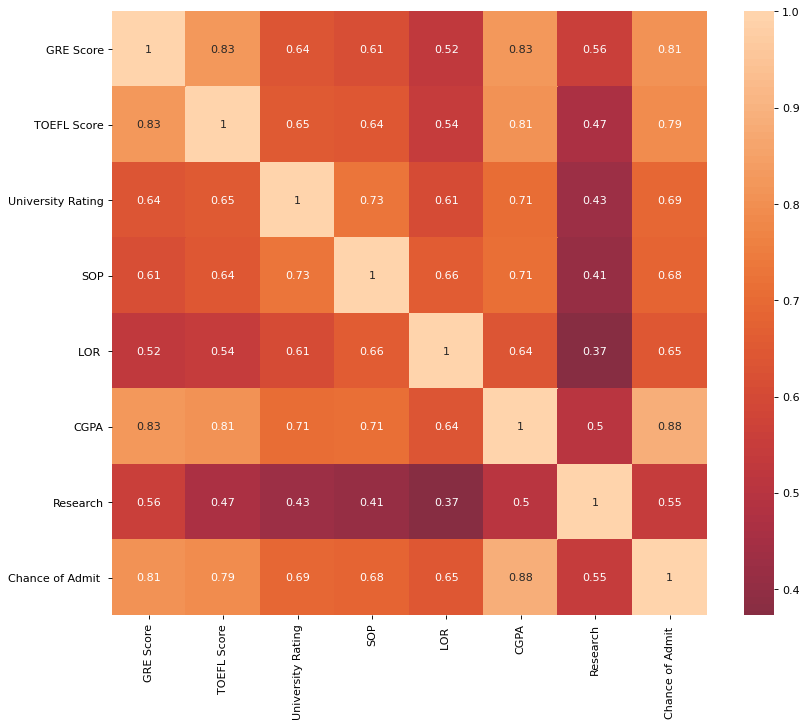

In [91]:
plt.figure(figsize=(12, 10), dpi=80)
sns.heatmap(admission_df.corr(), xticklabels=admission_df.corr().columns,
            yticklabels=admission_df.corr().columns, 
            center=0, annot=True)

Постройте отдельно две матрицы корреляций признаков и целевой переменной: для соискателей, делавших исследования (Research=1) и для тех, у кого исследований нет (Research=0).

In [93]:
OR = admission_df.loc[admission_df['Research'] == 1]
NR = admission_df.loc[admission_df['Research'] == 0]

<AxesSubplot:>

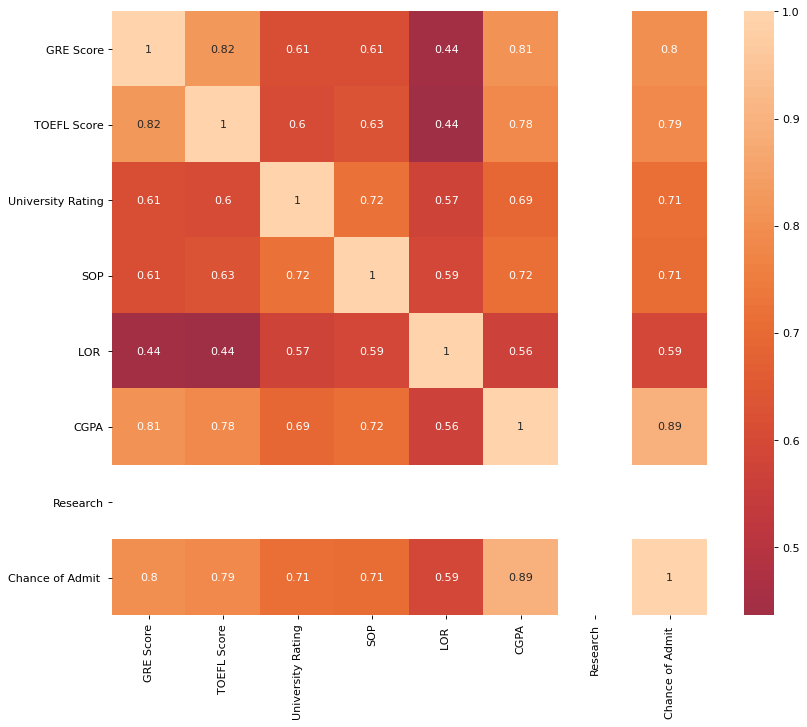

In [95]:
plt.figure(figsize=(12, 10), dpi=80)
sns.heatmap(OR.corr(), xticklabels=OR.corr().columns,
            yticklabels=OR.corr().columns, 
            center=0, annot=True)

<AxesSubplot:>

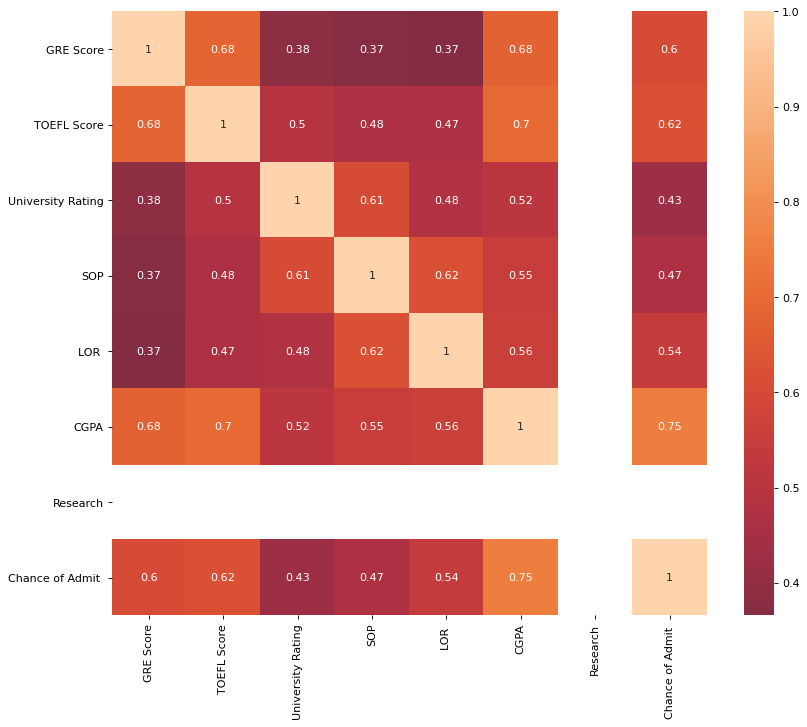

In [96]:
plt.figure(figsize=(12, 10), dpi=80)
sns.heatmap(NR.corr(), xticklabels=NR.corr().columns,
            yticklabels=NR.corr().columns, 
            center=0, annot=True)

Постройте OLS регрессию Chance of Admission на признаки TOEFL Score, CGPA без стандартизации. Используйте данные для соискателей, у которых нет исследований (Research == 0). Признаки запишите в матрицу данных в том порядке, в котором они представлены в DataFrame.

In [100]:
Data=NR[['TOEFL Score','CGPA']]
Data.shape[0]

220

In [102]:
TOEFL = Data['TOEFL Score']
CGPA = Data['CGPA']
A= np.column_stack((np.ones(220), TOEFL, CGPA))

In [105]:
y=NR[['Chance of Admit ']]

In [112]:
w_hat=np.linalg.inv(A.T@A)@A.T@y
w_hat = np.round(w_hat, 3)
w_hat

,Chance of Admit
0,-1.045
1,0.004
2,0.148


Сделайте прогноз шансов поступления в университет для абитуриента с TOEFL Score=107, CGPA=9.1, используя модель, полученную в задаче 2.11.6 (используйте округленные значения признаков).

In [113]:
TOEFL_new=107 
CGPA_new=9.1
new=np.array([1,TOEFL_new,CGPA_new])
new@w_hat

Chance of Admit     0.7298
dtype: float64

In [114]:
admit_new=w_hat.iloc[0]+w_hat.iloc[1]*TOEFL_new+w_hat.iloc[2]*CGPA_new
admit_new

Chance of Admit     0.7298
dtype: float64

Постройте OLS регрессию Chance of Admission на выбранные в задаче 2.11.5 признаки, однако теперь сперва стандартизируйте эти признаки.

In [115]:
meanTOEFL = Data['TOEFL Score'].mean()
meanCGPA  = Data['CGPA'].mean()
mean_y = y.mean()

In [116]:
TOEFL_c = Data['TOEFL Score'] - meanTOEFL
CGPA_c = Data['CGPA'] - meanCGPA
y_c = y - mean_y

In [117]:
TOEFL_c_norm = np.linalg.norm(TOEFL_c)
CGPA_c_norm = np.linalg.norm(CGPA_c)
y_c_norm = np.linalg.norm(y_c)

In [118]:
TOEFL_st=TOEFL_c / TOEFL_c_norm
CGPA_st=CGPA_c / CGPA_c_norm
y_st=y_c / y_c_norm

In [120]:
A_st=np.column_stack((TOEFL_st,CGPA_st))

In [121]:
w_hat_st=np.linalg.inv(A_st.T@A_st)@A_st.T@y_st.values
w_hat_st

array([[0.19044768],
       [0.62001517]])

[К содержанию](#1)

---

### Линейный оператор<a name="11"></a>

Умножение матрицы на вектор можно представить как его одновременный поворот и растяжение.  

А если рассмотреть умножение матрицы на все векторы пространства, то получится преобразование всего этого пространства или так называемый __линейный оператор__.

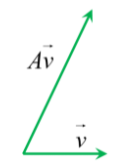

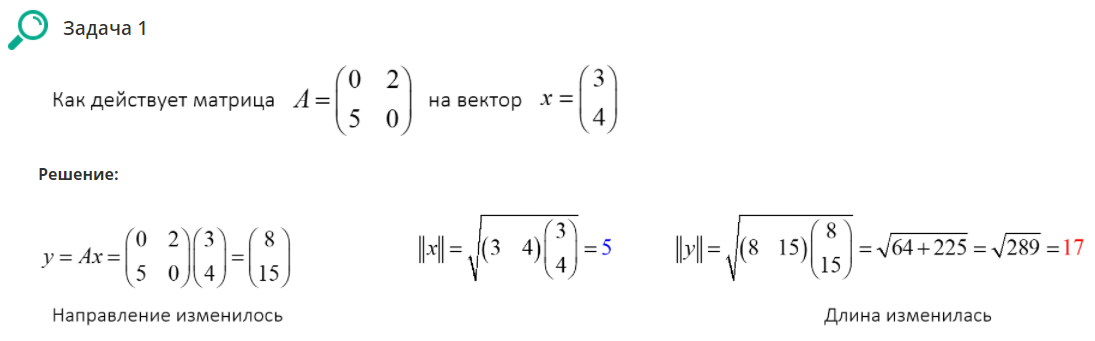

За изменение направления отвечает косинус угла между вектором x и его образом y. В нашем случае косинус близок к 1, значит, угол поворота небольшой.

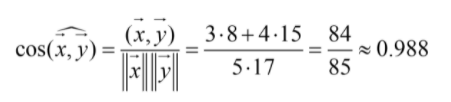

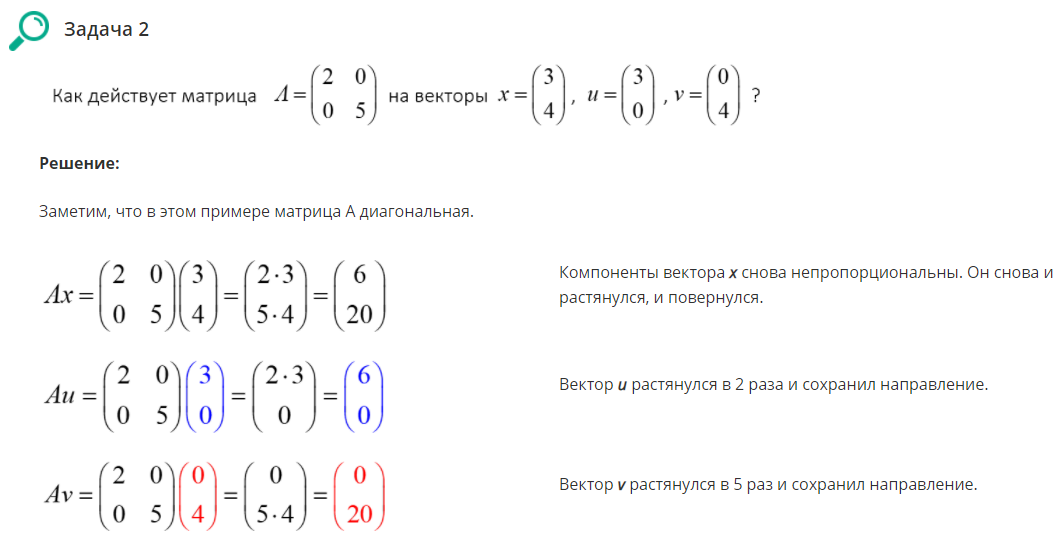

> Такие векторы как __u__ и __v__ называются __собственными__.

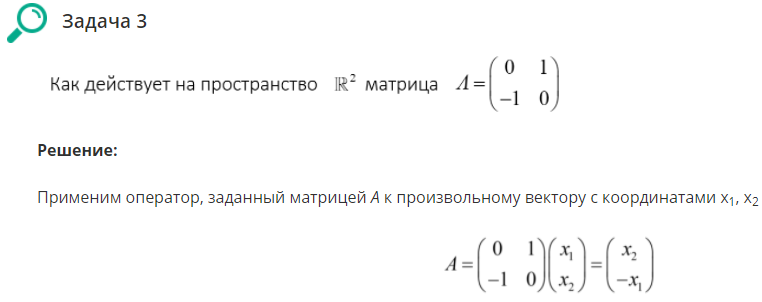

> Каждая квадратная матрица задаёт линейный оператор. Под действием этого оператора каждый вектор меняет длину и поворачивается. У разных векторов могут быть разные углы поворота и коэффициенты растяжения.

__Собственные векторы и числа__

*Определение*: __Собственный вектор__ или *айгенвектор* — это вектор, который не меняет направление под действием оператора, а только растягивается или сжимается.

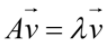

*Определение*: Коэффициент растяжения или сжатия __λ__ («лямбда») называется __собственным числом__ оператора А и его матрицы.

*Определение*: __Айгенпарой__ называется пара, состоящая из собственного числа и соответствующего ему собственного вектора.

*Определение*: __Спектром матрицы__ называется набор её собственных чисел.

__Задания__

> Результат действия оператора на вектор называют образом вектора.

Найдите образ вектора v при действии оператора F, если

In [122]:
v1 = np.array([1, 0, 0])
v2 = np.array([0, 0, 1])
v3 = np.array([0, -1, 0])
F = np.array([v1,v2,v3])
v = np.reshape(np.array([1,2,3]),(3,1))

In [124]:
np.linalg.norm(v)

3.7416573867739413

In [126]:
v_new = F@v
v_new

array([[ 1],
       [ 3],
       [-2]])

In [127]:
np.linalg.norm(v_new)

3.7416573867739413

Найдите образы векторов u и v при действии оператора F, если

In [146]:
v1 = np.array([2, 1])
v2 = np.array([1, 2])
F = np.array([v1,v2])
v = np.reshape(np.array([1,1]),(2,1))
u = np.reshape(np.array([1,-1]),(2,1))

In [129]:
np.linalg.norm(v)

1.4142135623730951

In [130]:
np.linalg.norm(u)

1.4142135623730951

In [131]:
v_new = F@v
v_new

array([[3],
       [3]])

In [132]:
u_new = F@u
u_new

array([[ 1],
       [-1]])

In [133]:
np.linalg.norm(v_new)

4.242640687119285

In [134]:
np.linalg.norm(u_new)

1.4142135623730951

In [142]:
u = u*5
u

array([[ 5],
       [-5]])

In [143]:
np.linalg.norm(u)

7.0710678118654755

In [144]:
u_new = F@u
u_new

array([[ 5],
       [-5]])

In [145]:
np.linalg.norm(u_new)

7.0710678118654755

In [147]:
vu = v+u

In [148]:
vu

array([[2],
       [0]])

In [149]:
np.linalg.norm(vu)

2.0

In [150]:
vu_new = F@vu
vu_new

array([[4],
       [2]])

In [151]:
np.linalg.norm(vu_new)

4.47213595499958

[К содержанию](#1)

---

### Собственные векторы и числа<a name="12"></a>

Итак, следующее уравнение должно иметь ненулевые решения

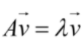

Перенесём всё в левую часть уравнения и немного поколдуем:

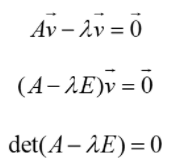

Конечно, никакой магии здесь нет. Как вы помните, умножение вектора на число — то же самое, что умножение его на скалярную (шаровую) матрицу. Нам это нужно, чтобы можно было честно вынести v со стрелкой за скобку. Так мы получили однородную систему уравнений, у которой всегда будет нулевое решение, но оно нам *неинтересно*, т.к. нулевые векторы не считаются собственными. Чтобы было ненулевое решение, матрица А – λE должна быть вырождена, то есть её определитель должен быть нулём.

Заметим, вычитание матрицы __λE__ — это всё равно что вычитание __λ__ по диагонали матрицы __А__. 

> __Алгоритм поиска собственных векторов__  и чисел на примере матрицы 2×2: 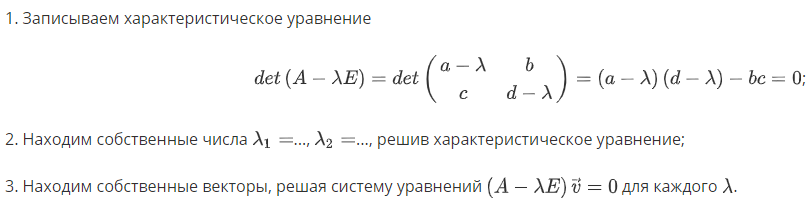

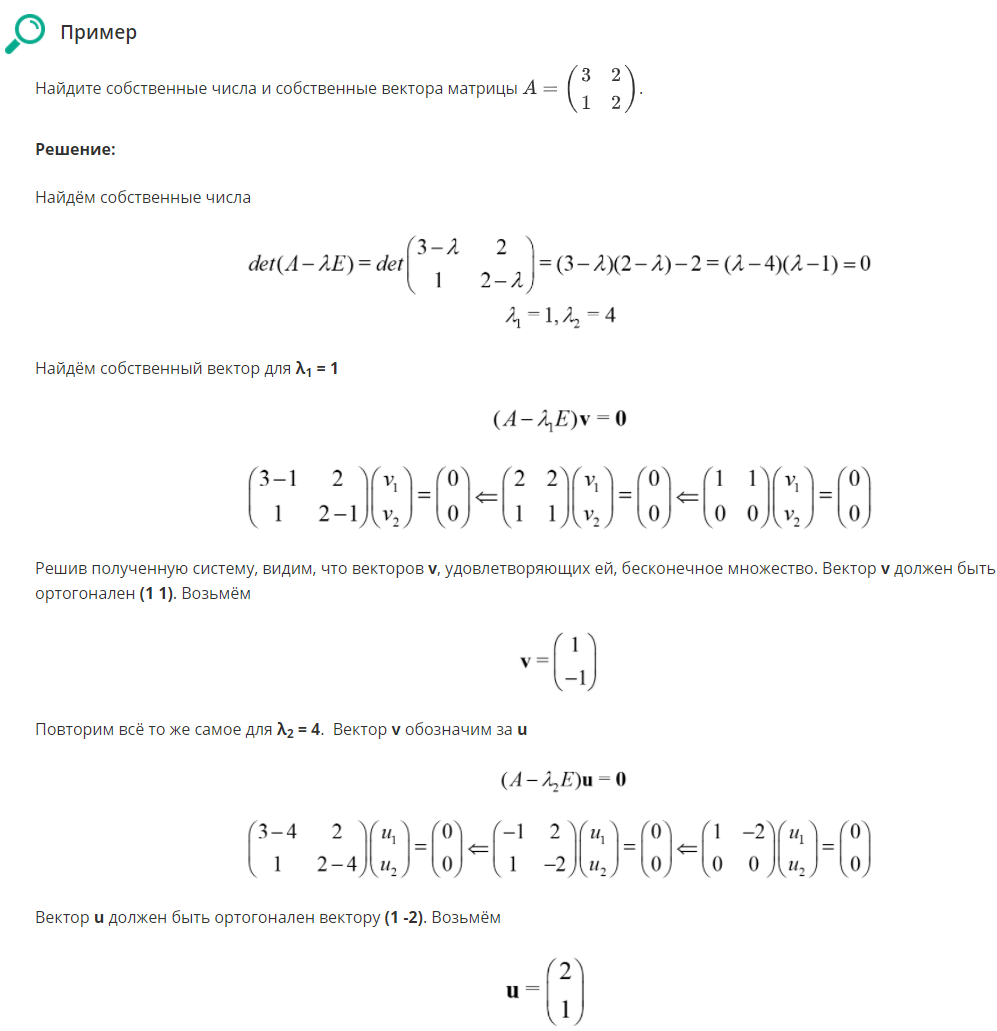

__Как искать для матрицы *n* x *n*?__

В общем случае порядок нахождения собственных чисел и векторов тот же, но:

* определитель считается не так просто, как в случае порядка 2;
* характеристическое уравнение имеет ту же степень, что и порядок матрицы, т.е. *n*;
* больше собственных чисел → больше вычислений для собственных векторов.

> Свойство спектра матрицы: произведение собственных чисел равно в точности определителю матрицы

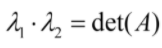

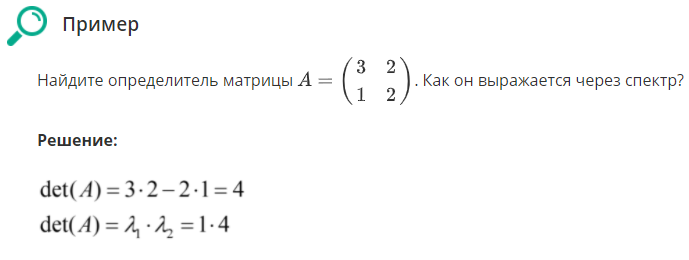

__Свойства спектра__

1. Все __λ > 0__ → матрица *A* положительно определена  
 Все __λ ≥ 0__ → матрица *A* НЕотрицательно определена  
 Все __λ < 0__ → матрица *A* отрицательно определена  
 Все __λ ≤ 0__ → матрица *A* НЕположительно определена  
2. __det(A) = λ1 · λ2 ·... · λn__
3. Нулевое собственное число означает вырожденность матрицы.
4. Собственные векторы из разных айгенпар, т.е. отвечающие разным собственным значениям, линейно независимы.

*Определение*: Матрицы с нулевыми или близкими к нулю собственными числами называются __плохо обусловленными__.

Матрица корреляций факторов *X* и их матрица Грама симметричны и потому обладают рядом крайне полезных свойств. Свойства симметричных матриц:

1. Полный набор собственных чисел и векторов. 
2. Если *A* — матрица Грама, то она неотрицательно определена и даже положительно определена, если её столбцы (регрессионные признаки) линейно независимы.
3. Собственные векторы симметричных матриц всегда ортогональны.

На этих свойствах работает метод главных компонент.

__Особые случаи__

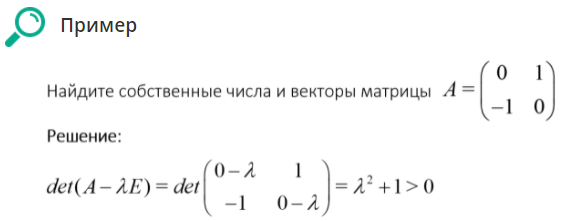

Характеристический многочлен матрицы __*A*λ(2) + 1__ не имеет вещественных корней, а значит, собственных чисел нет, а значит, нет и собственных векторов. Это неудивительно, матрица __*A*__ задаёт поворот вокруг начала координат, и у неё нет неподвижных направлений.

__Проблемы:__

1. *Не решается характеристическое уравнение*. А значит, матрица может не иметь вещественных собственных чисел вообще или иметь не полный набор. В анализе факторов регрессий это может значить, что мы выбрали не самый оптимальный алгоритм, и из-за накопившихся вычислительных ошибок матрица перестала быть симметричной. 
2. *Все собственные числа есть, но из-за особенностей кратности не хватило собственных векторов*. (На этой проблеме мы не будем останавливаться)
3. *Собственные числа нули или близки к нулю => Плохая обусловленность*. Давайте разберёмся, почему это плохо. Нулевые собственные числа дают нулевой определитель. Здесь всё ясно — обратная матрица к матрице *A.T@A* не существует, и алгоритм вычисления регрессионных коэффициентов по методу OLS рушится.  В реальном мире, если матрица *A.T@A* необратима, это говорит о мультиколлинеарности признаков, то есть о линейной зависимости между признаками. Однако ненулевые, но близкие к нулю значения собственных чисел и определителя тоже не сулят ничего хорошего. Как мы видели в последнем скринкасте первого модуля, обратная к плохо обусловненной матрице будет неустойчива. Это значит, что при добавлении одного нового измерения коэффициенты могут измениться очень сильно, а значит, мы не можем их интерпретировать. Кроме того, будет возникать переобучение регрессии: на обучающей выборке ошибка прогноза будет маленькая, а на тестовой — большая.

Бороться с плохой обусловленностью можно с помощью предварительного отбора признаков, __метода главных компонент__ (*Principal Compoment Analysis, PCA*) и __сингулярного разложения__ (*Singular Value Decomposition, SVD*)

__Спектральное разложение__

> Если у матрицы есть полный набор айгенпар, то у неё есть так называемое __спектральное разложение__

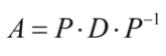

Здесь *D* — диагональная матрица, на диагонали которой стоят собственные числа *A*,
*P* — матрица, составленная из собственных векторов, записанных в столбцы. Все векторы записаны в столбцы в том порядке, в котором расположены парные к ним собственные числа в матрице *D*.

Про матрицу *A* говорят, что она __диагонализуема__, а *D* — её диагональный вид.

__Задания__

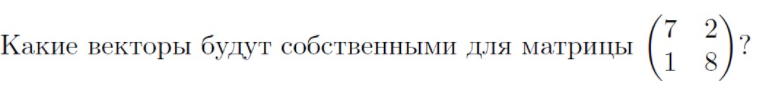

In [168]:
v1 = np.array([5, 1])
v2 = np.array([1, 5])
A = np.array([v1,v2])

In [169]:
w, v = np.linalg.eig(A)

In [170]:
w

array([6., 4.])

In [171]:
v

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [172]:
w*v

array([[ 4.24264069, -2.82842712],
       [ 4.24264069,  2.82842712]])

In [173]:
A = np.array([[1, 4, 5],
    [-5, 8, 9],
    [-6, 7, 11]]) # создаем матрицу 3х3 
B = np.linalg.eig(A) # находим собственные вектора (с.в.) и собственные числа (с.ч.) через np.linalg.eig
B
# Обратите внимание, что B - кортеж (tuple). Его компоненты имеют тип np.ndarray, с которыми вы уже должны быть знакомы. 
# Нулевая компонента B[0] - вектор собственных чисел, а компонента B[1] - матрица, столбцами которой являются 
# собственные вектора, соответствующие данному числу.; в данном случае собственному числу 13.59373746 
# соответствует собственный вектор [0.45145779, 0.62348353, 0.63832135]

(array([13.59373746,  5.03209301,  1.37416954]),
 array([[ 0.45145779,  0.83661458,  0.10258363],
        [ 0.62348353,  0.44632316, -0.77299039],
        [ 0.63832135,  0.31760303,  0.62606905]]))

[К содержанию](#1)

---

### Комплексные числа<a name="13"></a>

*Определение*:  i или мнимая единица — это комплексное число, квадрат которого равен −1

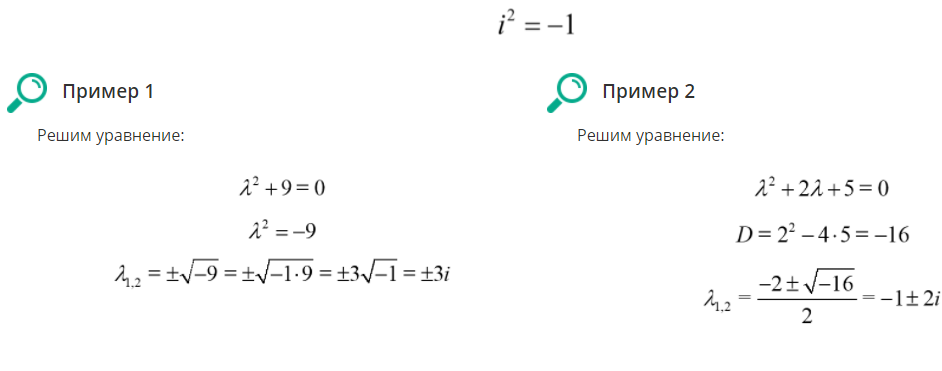

__Задания__

In [175]:
16**0.5

4.0

In [176]:
8**2-4*17

-4

[К содержанию](#1)

---

### Метод главных компонент, PCA<a name="14"></a>

__Постановка задачи__

Мы хотим прогнозировать много разных целевых параметров y на одну и ту же пару признаков x1 и x2.

Вспомним *Boston Housing Dataset*

In [177]:
boston = datasets.load_boston()
bostonDF=pd.DataFrame(boston.data, columns=boston.feature_names)
bostonDF['PRICE']=boston.target
bostonDF.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Рассмотрим в качестве признаков *DIS* и *NOX*. Это усредненное расстояние до *Employment Centres* и уровень загрязнения воздуха. Верно ли, что взять оба признака лучше, чем один?

__Решение:__

Два признака, как правило, содержат больше информации, чем один. Однако часто бывает, что они сильно скоррелированы. Это значит, что при оценке

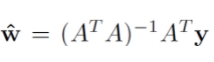

мы получим очень плохо обусловленную матрицу A.T@A.

Мы не умеем идеально точно считать на компьютере, поэтому получим огромные ошибки из-за округлений. Получается, что хотя мы неизбежно теряем часть информации при выборе только одного признака, с вычислительной точки зрения это более выгодная стратегия.

__Резюмируем__, что же мы хотим: выбрать один признак, который даст нам лучшие регрессии на разные целевые параметры.

На тепловой карте видно, что корреляция между нашими признаками достаточно велика и составляет –0.77

<AxesSubplot:>

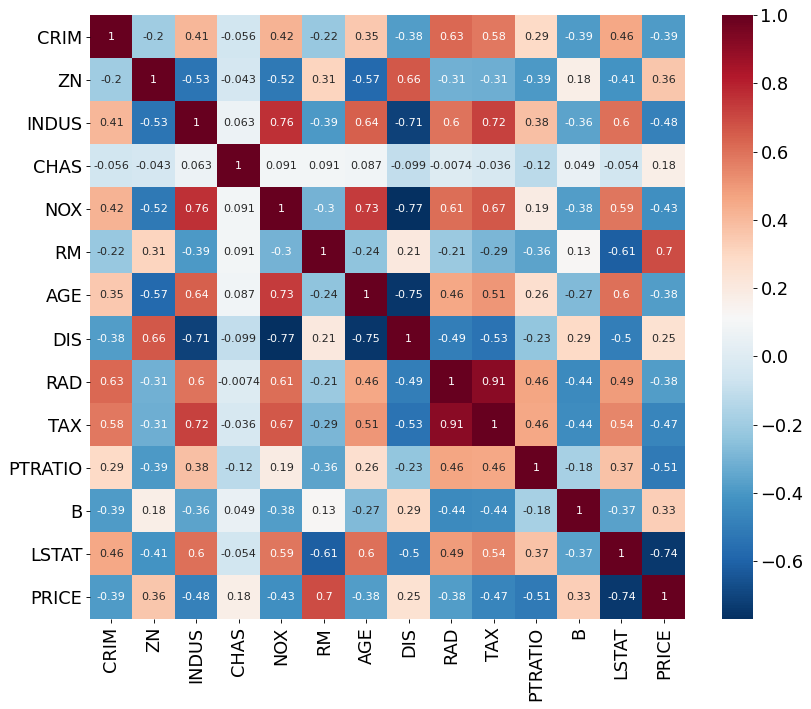

In [184]:
C = bostonDF.corr(method='pearson')
plt.figure(figsize=(12, 10), dpi=80) # размер графика
sns.heatmap(data=C, cmap='RdBu_r', annot=True)

Это значит, что в районах, где удобнее расположены *Employment Centres*, выше уровень загрязнения воздуха. На следующей картинке вы видите диаграмму рассеивания по этим двум признакам 

----------------
Корреляция: -0.77
----------------


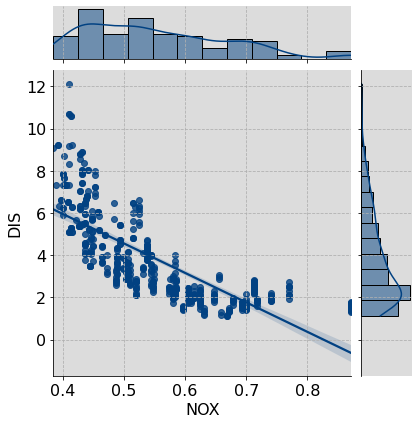

In [185]:
    x = 'NOX'
    y = 'DIS'
    corr = round(bostonDF[[x, y]].corr().values[0][1], 2)
    sns.jointplot(x=x, y=y, 
                  data=bostonDF, 
                  kind='reg', 
                  color='xkcd:darkish blue')
    print('----------------')
    print(f'Корреляция: {corr}')
    print('----------------')

Какой же признак выбрать: NOX или DIS?

__Решение:__

*Спойлер*: ни тот, ни другой! наилучшим новым признаком окажется комбинация старых, расположенная вдоль синей прямой.

__Алгоритм выбора признаков «на пальцах»:__

* Шаг 1.  
 Составить корреляционную матрицу признаков. Она же — матрица Грама стандартизированных признаков.
* Шаг 2.  
 Найти айгенпары этой матрицы.
* Шаг 3.  
 Выбрать бОльшее собственное число и его собственный вектор — он даст нам нужный признак.
* Шаг 4.  
 Пересчитать новый признак из старых.

*Примечание*: дополнительно делается нормировка нового признака. Ее можно выполнить в самом конце Шага 4 после пересчета, а можно нормировать собственные векторы на Шаге 3 (так делает компьютер). Наличие или отсутствие нормировки не повлияет на большинство свойств главных компонент.

Давайте применим алгоритм для выбора оптимального признака в нашей задаче:

Шаг 1.  
Пусть NOX будет первым фактором, а DIS - вторым.  
*corr ( NOX, DIS ) = − 0.77*

Корреляционная матрица 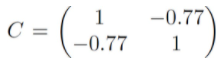

Её свойства гарантируют нам положительные собственные числа и полный набор собственных векторов.

Шаг 2.  
Собственные числа: 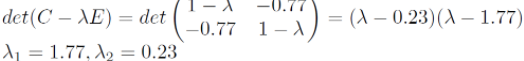
Собственные векторы: 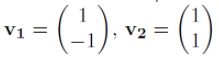

Шаг 3. 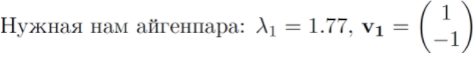

Шаг 4.  
Числа в собственном векторе будут коэффициентами для линейной комбинации старых признаков: 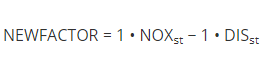
ВАЖНО! При пересчёте нужно брать именно стандартизированные признаки: центрированные и нормированные к единичной длине.

Давайте нормируем полученный вектор: 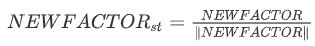
На самом деле это даже не нормировка, а целая стандартизация, просто среднее значение NEWFACTOR будет нулевым по построению. NEWFACTORst называется главной компонентой. Есть еще одна главная компонента, соответствующая мЕньшему собственному числу и вектору v2. Для понижения размерности и борьбы с мультиколлинеарностью мы берём только первую главную компоненту.

__Как изменится алгоритм для k признаков?__

* Шаги 1 и 2 не изменятся
* Шаг 3.  
 Для избавления от мультиколлинеарности нам нужно будет взять несколько самых больших собственных чисел и их айгенпар, а маленькие игнорировать.
* Шаг 4.  
 Можно пересчитать старые признаки в новые матричными преобразованием

__Анализ алгоритма__

1. Так как собственные векторы корреляционной матрицы ортогональны, то и новые признаки (главные компоненты) тоже будут ортогональны. Для нас это значит нескоррелированность.

2. В случае плохой обусловленности выбор значимых главных компонент позволяет позволяет достичь мЕньшей потери точности по сравнению с регрессией на сырые данные.

3. Можно искать не все собственные векторы, а только значимые — с «большими» собственными числами.

4. Есть несколько подходов к тому, какие собственные числа считать «большими».

Самый простой из них *Метод Кайзера*:  

Сначала вычисляем среднее собственное значение: 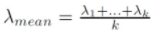
Cчитаем значимыми только те компоненты, у которых собственное число больше λmean.  

> *Cогласно правилу Кайзера нужно выбрать одну компоненту.*  

Есть также *Метод сломанной трости*. Иногда просто берут несколько максимальных собственных значений.  
> *Важное замечание*:  
В процессе выбора новых признаков никак не участвует целевая переменная. Если в нашем примере взять в качестве целевой переменной незначимую главную компоненту NOXst + DISst ,то наш новый классный признак вообще никак её не объяснит, потому что они ортогональны.  

Тем не менее для БОЛЬШИНСТВА целевых переменных выбор значимых главных компонент даёт лучший прогноз среди всех возможных линейных комбинаций признаков.

__Границы применимости__

1. В случае хорошо обусловленных данных обрезать главные компоненты часто не нужно, так как потери точности могут оказаться больше, чем мы хотели бы.

2. Для плохо обусловленных данных МАЛЫХ размерностей (для малого количества факторов) PCA — то, что доктор прописал.

3. Для плохо обусловленных данных БОЛЬШИХ размерностей (для большого количества факторов) при попытке применить PCA «в лоб» возникают вычислительные сложности.

Дело в том, что если у нас, например, 10 000 факторов, то придётся считать, хранить и обрабатывать матрицу корреляций размера 10 000 × 10 000, что не слишком удобно с точки зрения памяти и скорости.  

Поэтому в таких случаях значимые главные компоненты вычисляют через сингулярное разложение матрицы данных.

__Задания__

In [187]:
v1 = np.array([1, 0.9922])
v2 = np.array([0.9922, 1])
C = np.array([v1,v2])
wC, vC = np.linalg.eig(C)

In [188]:
wC

array([1.9922, 0.0078])

In [195]:
vC

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [192]:
wC*vC

array([[ 1.40869813, -0.00551543],
       [ 1.40869813,  0.00551543]])

In [193]:
x1 = np.array([1, 2, 1, 1])
x2 = np.array([70, 130, 65, 60])
A = np.array([x1,x2]).T

In [196]:
x1_st = (x1-x1.mean())/np.linalg.norm(x1-x1.mean())
x2_st = (x2-x2.mean())/np.linalg.norm(x2-x2.mean())

In [197]:
nf = 0.70710678*x1_st + 0.70710678*x2_st
nf

array([-0.34433896,  1.21996996, -0.40665665, -0.46897435])

In [199]:
nf_st = nf/np.linalg.norm(nf)
np.round(nf_st,4)

array([-0.244 ,  0.8643, -0.2881, -0.3323])

[К содержанию](#1)

---

### Сингулярное разложение, SVD<a name="15"></a>

Любую прямоугольную матрицу A размера N × k можно представить в виде: 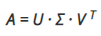

__U__ — матрица размера N × N. Все её столбцы ортогональны друг другу и имеют единичную длину. Такие матрицы называются __ортогональными__.  

__Σ__ — матрица размера N × k. У неё на главной диагонали стоят так называемые __сингулярные числа__, а вне главной диагонали нули.  

__V__ — матрица k × k. Она тоже ортогональная.  

__Идея__: Если A — матрица стандартизированных признаков, то в строках матрицы VT расположены нужные нам собственные векторы корреляционной матрицы, а на главной диагонали Σ — корни из собственных чисел корреляционной матрицы.  

Если мы научимся быстро считать сингулярное разложение, это решит задачу поиска главных компонент.  

Для этого, во-первых, договоримся в матрице Σ все диагональные элементы писать так, чтобы левый верхний был самый большой, а правый нижний — самый маленький. Тогда все «большие» сингулярные числа сосредоточатся в левом верхнем углу. И нам будет достаточно вычислить и хранить только его, а остальное заменить нулями.  

То же касается и матриц U, VT. Если A плохо обусловлена, то «хорошие» собственные векторы корреляционной матрицы будут расположены в верхней части матрицы VT, а остальные будут незначимы и мы сможем заменить их на нули, у матрицы U значимые столбцы будут слева, а справа — незначимые, которые тоже сможем обрезать нулевыми.  

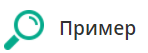
> Пусть у нас есть 10000 наблюдений по 5000 признаков. Тогда: 

> Если данные очень плохо обусловлены и «больших» (не совсем нулевых) собственных чисел всего 10, то мы сможем хранить только небольшие кусочки от всего здорового разложения:

> 10 признаков по 10000 наблюдений из матрицы __U__, угол 10 на 10 из матрицы __Σ__ и первые 10 строк из матрицы __VT__. И всё это вместо матриц размера 10000 на 10000, 10000 на 5000 и 5000 на 5000.

__Как считать?__

Для вычисления сингулярного разложения используются разные итеративные алгоритмы, которые не считают все разложение целиком, а вычисляют постепенно.

__Где используется?__

SVD разложение зашито внутри очень многих алгоритмов в Python.  

Например, функция __numpy.linalg.rank__ использует его, когда считает ранг матрицы. А __numpy.linalg.det__ и __numpy.linalg.inv__ не используют, поэтому у них получаются неадекватные результаты для плохо обусловленных матриц, а ранг всегда вычисляется верно.  

Функция __numpy.linalg.lstsq__ вычисляет оценку решения переопределенной системы методом OLS. Она тоже работает на SVD и устойчива к плохо обусловленным матрицам.

[К содержанию](#1)